Import libraries

In [1]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import plotly.graph_objs as go
from IPython.display import Image

**EVALUATION**

**Load the Causal metrics AUC values and analyze them**

In [5]:
#@title
# load the Causal metrics AUC curves results
with open('../Scraping_curves.json') as json_file: 
  curves_dict = json.load(json_file)

# intermediate dictionaries to record
holmes_deletion_auc_dict = {}
holmes_insertion_auc_dict = {}
holmes_preservation_auc_dict = {}
gradcam_deletion_auc_dict = {}
gradcam_insertion_auc_dict = {}
gradcam_preservation_auc_dict = {}
pred_class_dict = {}
num_pred_dict = {}

holonyms = list(curves_dict.keys())
for i, holonym in enumerate(holonyms):
  holonym_dict = curves_dict[holonym]      # holonym class dict
  holonym_img_names = curves_dict[holonym]['curves'].keys() # VOC validation images for the holonym

  for j, img_name in enumerate(holonym_img_names):
    if j == 0:
        holmes_deletion_auc_dict[holonym] = []
        holmes_insertion_auc_dict[holonym] = []
        holmes_preservation_auc_dict[holonym] = []
        gradcam_deletion_auc_dict[holonym] = []
        gradcam_insertion_auc_dict[holonym] = []
        gradcam_preservation_auc_dict[holonym] = []        
        pred_class_dict[holonym] = []
        num_pred_dict[holonym] = 0
    elif j>=50:
      break
    
    img_pred_class = holonym_dict['curves'][img_name]['pred_class']

    # list of pred values
    pred_class_dict[holonym].append(img_pred_class)
    # check if the class prediction is correct, i.e. it is equal to the holonym class
    if img_pred_class != holonym:
        continue

    #print("{} -> {}".format(img_pred_class, holonym))
    
    num_pred_dict[holonym] += 1
    # holmes
    img_holmes_deletion_auc = holonym_dict['curves'][img_name]['holmes_deletion']
    img_holmes_insertion_auc = holonym_dict['curves'][img_name]['holmes_insertion']
    img_holmes_preservation_auc = holonym_dict['curves'][img_name]['holmes_preservation']
    # list of aucs
    holmes_deletion_auc_dict[holonym].append(img_holmes_deletion_auc)
    holmes_insertion_auc_dict[holonym].append(img_holmes_insertion_auc)
    holmes_preservation_auc_dict[holonym].append(img_holmes_preservation_auc)
    # gradcam    
    img_gradcam_deletion_auc = holonym_dict['curves'][img_name]['gradcam_deletion']
    img_gradcam_insertion_auc = holonym_dict['curves'][img_name]['gradcam_insertion']
    img_gradcam_preservation_auc = holonym_dict['curves'][img_name]['gradcam_preservation']
    # list of aucs
    gradcam_deletion_auc_dict[holonym].append(img_gradcam_deletion_auc)
    gradcam_insertion_auc_dict[holonym].append(img_gradcam_insertion_auc)
    gradcam_preservation_auc_dict[holonym].append(img_gradcam_preservation_auc)

In [6]:
num_pred_dict

{'sorrel': 47,
 'zebra': 45,
 'hog': 26,
 'ox': 25,
 'water buffalo': 43,
 'bison': 43,
 'ram': 32,
 'ibex': 43,
 'Arabian camel': 46,
 'tabby': 30,
 'tiger cat': 10,
 'Persian cat': 44,
 'Siamese cat': 47,
 'Egyptian cat': 23,
 'cougar': 42,
 'lynx': 34,
 'leopard': 39,
 'snow leopard': 44,
 'jaguar': 34,
 'lion': 47,
 'tiger': 46,
 'cheetah': 45,
 'loggerhead': 38,
 'leatherback turtle': 25,
 'mud turtle': 28,
 'terrapin': 25,
 'box turtle': 40,
 'common iguana': 40,
 'American alligator': 37,
 'rock python': 25,
 'diamondback': 33,
 'sidewinder': 17,
 'dishwasher': 30,
 'Dutch oven': 36,
 'microwave': 26,
 'rotisserie': 41,
 'stove': 21,
 'toaster': 27,
 'broom': 31,
 'hammer': 23,
 'hatchet': 23,
 'power drill': 15,
 'screw': 44,
 'screwdriver': 16,
 'shovel': 30,
 'airliner': 48,
 'ambulance': 46,
 'barrow': 36,
 'beach wagon': 27,
 'bicycle-built-for-two': 40,
 'cab': 37,
 'convertible': 40,
 'fire engine': 41,
 'freight car': 49,
 'garbage truck': 45,
 'horse cart': 42,
 'jeep':

**Calculate average of the causal metrics separately for each holonym -> for each holonym the number or correctly predicted images is different**

In [7]:
# calculate average of the causal metrics separately for each holonym
holmes_holonyms_avg_deletion = {}
holmes_holonyms_avg_insertion = {}
holmes_holonyms_avg_preservation = {}
gradcam_holonyms_avg_deletion = {}
gradcam_holonyms_avg_insertion = {}
gradcam_holonyms_avg_preservation = {}

ratio_holonyms_avg_deletion = {}
ratio_holonyms_avg_insertion = {}
ratio_holonyms_avg_preservation = {}

for i, holonym in enumerate(holonyms):
    holmes_holonyms_avg_deletion[holonym] = np.mean(holmes_deletion_auc_dict[holonym])
    holmes_holonyms_avg_insertion[holonym] = np.mean(holmes_insertion_auc_dict[holonym])
    holmes_holonyms_avg_preservation[holonym] = np.mean(holmes_preservation_auc_dict[holonym])
    
    gradcam_holonyms_avg_deletion[holonym] = np.mean(gradcam_deletion_auc_dict[holonym])
    gradcam_holonyms_avg_insertion[holonym] = np.mean(gradcam_insertion_auc_dict[holonym])
    gradcam_holonyms_avg_preservation[holonym] = np.mean(gradcam_preservation_auc_dict[holonym])
    
    ratio_holonyms_avg_deletion[holonym] = holmes_holonyms_avg_deletion[holonym] / gradcam_holonyms_avg_deletion[holonym]
    ratio_holonyms_avg_insertion[holonym] = holmes_holonyms_avg_insertion[holonym] / gradcam_holonyms_avg_insertion[holonym]
    ratio_holonyms_avg_preservation[holonym] = holmes_holonyms_avg_preservation[holonym] / gradcam_holonyms_avg_preservation[holonym]

Show results

In [8]:
holmes_holonyms_avg_deletion

{'sorrel': 0.1788568753864559,
 'zebra': 0.3235304857537822,
 'hog': 0.07863968808115188,
 'ox': 0.06686587047758277,
 'water buffalo': 0.057237970505203115,
 'bison': 0.1041065255210227,
 'ram': 0.08841589420561692,
 'ibex': 0.13786895285832276,
 'Arabian camel': 0.15041375001077867,
 'tabby': 0.07858345881933117,
 'tiger cat': 0.03167404011852141,
 'Persian cat': 0.05146179181373684,
 'Siamese cat': 0.1900172070826516,
 'Egyptian cat': 0.07017569440025463,
 'cougar': 0.19533414648455713,
 'lynx': 0.09533543404778856,
 'leopard': 0.27996903228427905,
 'snow leopard': 0.21169721518390866,
 'jaguar': 0.19236244588444887,
 'lion': 0.11831371277137172,
 'tiger': 0.10346877702388645,
 'cheetah': 0.23829859589022115,
 'loggerhead': 0.0879096262007268,
 'leatherback turtle': 0.20259215657052498,
 'mud turtle': 0.053020452099294034,
 'terrapin': 0.07417269433582128,
 'box turtle': 0.08934111208963169,
 'common iguana': 0.11838588484333323,
 'American alligator': 0.08072054509850127,
 'rock py

In [9]:
holmes_holonyms_avg_insertion

{'sorrel': 0.8089227119733254,
 'zebra': 0.8900916536978495,
 'hog': 0.5788985227231117,
 'ox': 0.5086615552628575,
 'water buffalo': 0.6992599136882165,
 'bison': 0.7542038073707746,
 'ram': 0.5136866488598962,
 'ibex': 0.7385598171121972,
 'Arabian camel': 0.7632697822044122,
 'tabby': 0.39939387652334507,
 'tiger cat': 0.41979282945181434,
 'Persian cat': 0.8092036519674999,
 'Siamese cat': 0.8499339513840583,
 'Egyptian cat': 0.546566245910625,
 'cougar': 0.8026676241095922,
 'lynx': 0.7466296485708007,
 'leopard': 0.7527205382770789,
 'snow leopard': 0.7800717740250456,
 'jaguar': 0.7752044839651118,
 'lion': 0.7533129522811851,
 'tiger': 0.6810440677178322,
 'cheetah': 0.8329925892815554,
 'loggerhead': 0.5297180722023783,
 'leatherback turtle': 0.47598388877629444,
 'mud turtle': 0.48388393075422836,
 'terrapin': 0.7127776239454371,
 'box turtle': 0.641866957972511,
 'common iguana': 0.7218249756135175,
 'American alligator': 0.6478637528601434,
 'rock python': 0.299181114567225

In [10]:
holmes_holonyms_avg_preservation

{'sorrel': 0.5359997760249007,
 'zebra': 0.7450769653543279,
 'hog': 0.4366945491148736,
 'ox': 0.49614576982466935,
 'water buffalo': 0.6023677372923487,
 'bison': 0.5982522862569518,
 'ram': 0.4594801411461487,
 'ibex': 0.6600189234775851,
 'Arabian camel': 0.7075744923304998,
 'tabby': 0.3585220873371279,
 'tiger cat': 0.2489387267818151,
 'Persian cat': 0.631030503318517,
 'Siamese cat': 0.6877257140248123,
 'Egyptian cat': 0.47410576214028316,
 'cougar': 0.7477912254436968,
 'lynx': 0.5608227289845019,
 'leopard': 0.6227120432610623,
 'snow leopard': 0.6830002004137374,
 'jaguar': 0.6263494581583156,
 'lion': 0.6192797199119178,
 'tiger': 0.5753372937900071,
 'cheetah': 0.8121147182076434,
 'loggerhead': 0.5042103320014167,
 'leatherback turtle': 0.5494176656675264,
 'mud turtle': 0.32966482131996994,
 'terrapin': 0.6310891929047583,
 'box turtle': 0.584641655938027,
 'common iguana': 0.6117226160535806,
 'American alligator': 0.4899912244421537,
 'rock python': 0.2263528608077871

In [11]:
# lower is better
ratio_holonyms_avg_deletion

{'sorrel': 1.325843509257508,
 'zebra': 1.1122967278955391,
 'hog': 1.0491489692951974,
 'ox': 0.9672449571978436,
 'water buffalo': 0.9654557980636258,
 'bison': 1.1726545566783,
 'ram': 1.1315415695094146,
 'ibex': 1.1693580869921028,
 'Arabian camel': 1.1346400560804086,
 'tabby': 1.0033937583615686,
 'tiger cat': 0.521513736750789,
 'Persian cat': 0.9113697778517414,
 'Siamese cat': 1.244676313518131,
 'Egyptian cat': 0.788025996371343,
 'cougar': 1.3863533996028996,
 'lynx': 1.1471568058460202,
 'leopard': 1.084923551811778,
 'snow leopard': 1.0544162687568686,
 'jaguar': 0.912927694084193,
 'lion': 1.2922949948562952,
 'tiger': 0.68302693421605,
 'cheetah': 0.9953493576865133,
 'loggerhead': 1.1185990101222947,
 'leatherback turtle': 1.054268483391286,
 'mud turtle': 1.0240516879128394,
 'terrapin': 0.9443275201333202,
 'box turtle': 0.6960591965121722,
 'common iguana': 1.1865861152453303,
 'American alligator': 1.070171994223119,
 'rock python': 1.4344702012488884,
 'diamondbac

In [12]:
# higher is better
ratio_holonyms_avg_insertion

{'sorrel': 0.9569551517822815,
 'zebra': 0.9552173788939696,
 'hog': 0.947082629690805,
 'ox': 0.9701282773093415,
 'water buffalo': 0.9514290318892179,
 'bison': 0.9436556777515853,
 'ram': 0.9558432275418943,
 'ibex': 0.9989226020418729,
 'Arabian camel': 0.9832623288897813,
 'tabby': 0.9613894337121817,
 'tiger cat': 1.0814902255158831,
 'Persian cat': 0.9776792681086015,
 'Siamese cat': 0.953216967199964,
 'Egyptian cat': 0.9748046245578202,
 'cougar': 0.9665555286580204,
 'lynx': 1.0197286595949,
 'leopard': 0.9928451842580255,
 'snow leopard': 0.973116362144773,
 'jaguar': 1.0057717336179504,
 'lion': 0.9366199596153334,
 'tiger': 0.9999545153445503,
 'cheetah': 1.0025681098170462,
 'loggerhead': 0.9635046560590145,
 'leatherback turtle': 0.7858008158954358,
 'mud turtle': 0.9276117849078388,
 'terrapin': 0.977048472247809,
 'box turtle': 0.9815384660490303,
 'common iguana': 0.98426129336803,
 'American alligator': 0.9261716798736445,
 'rock python': 0.7892818374339433,
 'diamon

In [13]:
# bigger is better
ratio_holonyms_avg_preservation

{'sorrel': 0.8936882208675554,
 'zebra': 0.9063561332408723,
 'hog': 0.9728460082809209,
 'ox': 1.0532493999387877,
 'water buffalo': 0.9788156512424586,
 'bison': 0.9570624145028791,
 'ram': 0.9599845307837025,
 'ibex': 0.9995675006073697,
 'Arabian camel': 0.9333840674662588,
 'tabby': 1.061606324201489,
 'tiger cat': 1.0431187642748623,
 'Persian cat': 1.0571506246054752,
 'Siamese cat': 0.904051551952562,
 'Egyptian cat': 1.0240268184507546,
 'cougar': 0.9546475500634457,
 'lynx': 1.0853893181898682,
 'leopard': 0.9919619811037721,
 'snow leopard': 0.9675755235312489,
 'jaguar': 1.0935362040872658,
 'lion': 0.8828807445828375,
 'tiger': 1.0882984126217863,
 'cheetah': 0.9898267849793626,
 'loggerhead': 0.9815380946673716,
 'leatherback turtle': 0.8382777645623969,
 'mud turtle': 1.1345556880517074,
 'terrapin': 0.9787952313633849,
 'box turtle': 0.9772351094658983,
 'common iguana': 0.9870919441128804,
 'American alligator': 0.887537900186652,
 'rock python': 0.8485611949532972,
 '

**Calculate the average of the causal metrics over all images of all holonyms -> overall evaluation regardless of the number correctly predicted images for each holonym**

In [14]:
# calculate the average of the causal metrics over all images of all holonyms
holmes_all_deletion = []
holmes_all_insertion = []
holmes_all_preservation = []
gradcam_all_deletion = []
gradcam_all_insertion = []
gradcam_all_preservation = []

for i, holonym in enumerate(holonyms):
    holmes_all_deletion.append(holmes_deletion_auc_dict[holonym])
    holmes_all_insertion.append(holmes_insertion_auc_dict[holonym])
    holmes_all_preservation.append(holmes_preservation_auc_dict[holonym])
    
    gradcam_all_deletion.append(gradcam_deletion_auc_dict[holonym])
    gradcam_all_insertion.append(gradcam_insertion_auc_dict[holonym])
    gradcam_all_preservation.append(gradcam_preservation_auc_dict[holonym])
    

# convert from list of lists to simple list
holmes_all_deletion = sum(holmes_all_deletion, [])
holmes_all_insertion = sum(holmes_all_insertion, [])
holmes_all_preservation = sum(holmes_all_preservation, [])
gradcam_all_deletion = sum(gradcam_all_deletion, [])
gradcam_all_insertion = sum(gradcam_all_insertion, [])
gradcam_all_preservation = sum(gradcam_all_preservation, [])

holmes_all_deletion_avg = np.mean(holmes_all_deletion)
holmes_all_deletion_std = np.std(holmes_all_deletion)
holmes_all_insertion_avg = np.mean(holmes_all_insertion)
holmes_all_insertion_std = np.std(holmes_all_insertion)
holmes_all_preservation_avg = np.mean(holmes_all_preservation)
holmes_all_preservation_std = np.std(holmes_all_preservation)
gradcam_all_deletion_avg = np.mean(gradcam_all_deletion)
gradcam_all_deletion_std = np.std(gradcam_all_deletion)
gradcam_all_insertion_avg = np.mean(gradcam_all_insertion)
gradcam_all_insertion_std = np.std(gradcam_all_insertion)
gradcam_all_preservation_avg = np.mean(gradcam_all_preservation)
gradcam_all_preservation_std = np.std(gradcam_all_preservation)

ratio_all_deletion = holmes_all_deletion_avg/gradcam_all_deletion_avg
ratio_all_insertion = holmes_all_insertion_avg/gradcam_all_insertion_avg
ratio_all_preservation = holmes_all_preservation_avg/gradcam_all_preservation_avg

Show results

In [15]:
print("Holmes avg deletion: {} +- {}".format(round(holmes_all_deletion_avg, 3), round(holmes_all_deletion_std, 3)))

Holmes avg deletion: 0.114 +- 0.119


In [16]:
print("GradCAM avg deletion: {} +- {}".format(round(gradcam_all_deletion_avg, 3), round(gradcam_all_deletion_std, 3)))

GradCAM avg deletion: 0.111 +- 0.107


In [17]:
# lower is better
print("Holmes-GradCAM avg deletion ratio: {}".format(round(ratio_all_deletion, 3)))

Holmes-GradCAM avg deletion ratio: 1.024


In [18]:
print("Holmes avg insertion: {} +- {}".format(round(holmes_all_insertion_avg, 3), round(holmes_all_insertion_std, 3)))

Holmes avg insertion: 0.659 +- 0.252


In [19]:
print("GradCAM avg insertion: {} +- {}".format(round(gradcam_all_insertion_avg, 3), round(gradcam_all_insertion_std, 3)))

GradCAM avg insertion: 0.684 +- 0.242


In [20]:
# higher is better
print("Holmes-GradCAM avg insertion ratio: {}".format(round(ratio_all_insertion, 3)))

Holmes-GradCAM avg insertion ratio: 0.963


In [21]:
print("Holmes avg preservation: {} +- {}".format(round(holmes_all_preservation_avg, 3), round(holmes_all_preservation_std, 3)))

Holmes avg preservation: 0.534 +- 0.257


In [22]:
print("GradCAM avg preservation: {} +- {}".format(round(gradcam_all_preservation_avg, 3), round(gradcam_all_preservation_std, 3)))

GradCAM avg preservation: 0.539 +- 0.261


In [23]:
# higher is better
print("Holmes-GradCAM avg preservation ratio: {}".format(round(ratio_all_preservation, 3)))

Holmes-GradCAM avg preservation ratio: 0.991


In [24]:
plt.rcParams.update({'font.size': 15})

custom_lines = [Line2D([0], [0], color="royalblue", lw=5),
                Line2D([0], [0], color="darkorange", lw=5)]

def draw_distributions_comparison(dist_values_1, dist_values_2, title_1, title_2, better_str):
    x = [title_1, title_2]
    mean_dist_1 = (round(np.mean(dist_values_1), 3))
    mean_dist_2 = (round(np.mean(dist_values_2), 3))

    fig = plt.figure(figsize=(10,9))
    ax = sns.violinplot(data=[dist_values_1, dist_values_2])

    ax.text(0+0.02, np.mean(dist_values_1)-0.02, "mean=" + str(mean_dist_1)+ "\n("+ better_str + " is better)")
    ax.text(1+0.02, np.mean(dist_values_2)-0.02, "mean=" + str(mean_dist_2)+ "\n("+ better_str + " is better)")

    plt.xticks([], )
    plt.legend(custom_lines, x, loc='upper right')
    plt.title(title_1 + ' and ' + title_2)
    plt.show()

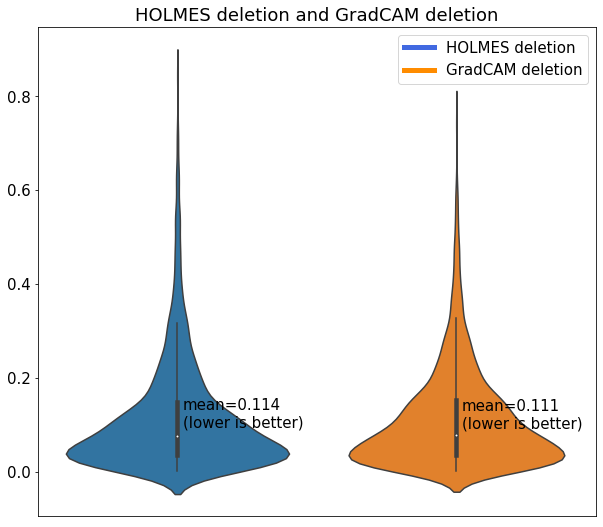

In [25]:
draw_distributions_comparison(holmes_all_deletion, gradcam_all_deletion, 'HOLMES deletion', 'GradCAM deletion', "lower")

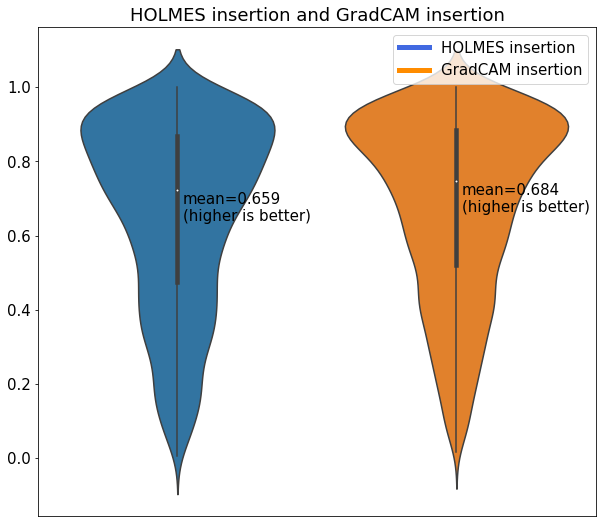

In [26]:
draw_distributions_comparison(holmes_all_insertion, gradcam_all_insertion, 'HOLMES insertion', 'GradCAM insertion', "higher")

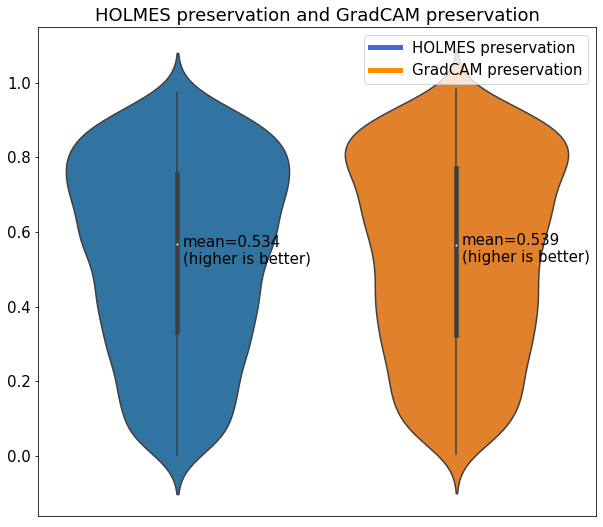

In [27]:
draw_distributions_comparison(holmes_all_preservation, gradcam_all_preservation, 'HOLMES preservation', 'GradCAM preservation', "higher")